In [1]:
!pip install sqlalchemy

You should consider upgrading via the '/Users/anjali/DS2002/bin/python3 -m pip install --upgrade pip' command.


In [28]:
## Creating a connection to the database
import sqlite3

# Create or connect to an SQLite database
connection = sqlite3.connect('student_grades.db')

# Check if the connection was successful
print("Database created and connected!")

Database created and connected!


In [29]:
## Creating a cursor object 
cursor = connection.cursor()

# Explanation
print("Cursor created!")

Cursor created!


In [30]:
# create students table 
cursor.execute('''
CREATE TABLE IF NOT EXISTS students (
    student_id INTEGER PRIMARY KEY AUTOINCREMENT,
    first_name TEXT NOT NULL,
    last_name TEXT
)
''')

print("Students table created!")

Students table created!


In [41]:
# Drop the existing grades table
cursor.execute('DROP TABLE IF EXISTS grades')

# Recreate the table with the correct structure
cursor.execute('''
CREATE TABLE IF NOT EXISTS grades (
    grade_id INTEGER PRIMARY KEY AUTOINCREMENT,
    student_id INTEGER,
    subject TEXT NOT NULL,
    grade INTEGER,
    FOREIGN KEY (student_id) REFERENCES students(student_id)
)
''')

print("Grades table recreated!")


Grades table recreated!


In [38]:
# insert data into student table 

# Sample data to insert into the sales table
students_data = [
    ('Alice', 'Johnson'),
    ('Bob', 'Smith'),
    ('Carol', 'White'),
    ('David', 'Brown'),
    ('Eve', 'Davis')
]

# Insert data into the table
cursor.executemany('''
INSERT INTO students (first_name, last_name) VALUES (?, ?)
''', students_data)

# Commit the transaction
connection.commit()

print("Data inserted into the students table!")

Data inserted into the students table!


In [42]:
# insert data into the grades tables

# Sample data to insert into the sales table
grades_data = [
    (1, 'Math', 98),
    (1, 'English', 77),
    (2, 'Math', 23),
    (2, 'English', 100),
    (3, 'Math', 89),
    (3, 'English', 90),
    (4, 'Math', 93),
    (4, 'English', 93),
    (5, 'Math', 100),
    (5, 'English', 100)
]

# Insert data into the table
cursor.executemany('''
INSERT INTO grades (student_id, subject, grade) VALUES (?, ?, ?)
''', grades_data)

# Commit the transaction
connection.commit()

print("Data inserted into the grades table!")

Data inserted into the grades table!


In [45]:
# Retrieve all students' names and grades using a JOIN
cursor.execute('''
SELECT students.first_name, students.last_name, grades.subject, grades.grade 
FROM students
JOIN grades ON students.student_id = grades.student_id
''')

rows = cursor.fetchall()

# Print the results
print("All students' names and grades:")
for row in rows:
    print(row)


All students' names and grades:
('Alice', 'Johnson', 'Math', 98)
('Alice', 'Johnson', 'English', 77)
('Bob', 'Smith', 'Math', 23)
('Bob', 'Smith', 'English', 100)
('Carol', 'White', 'Math', 89)
('Carol', 'White', 'English', 90)
('David', 'Brown', 'Math', 93)
('David', 'Brown', 'English', 93)
('Eve', 'Davis', 'Math', 100)
('Eve', 'Davis', 'English', 100)


In [47]:
# Find average grade per student
cursor.execute('''
SELECT student_id, AVG(grade) AS average_grade 
FROM grades
GROUP BY student_id
''')

# Fetch all results
average_grades = cursor.fetchall()

# Display the result
print("Average grade per student:")
for row in average_grades:
    print(f"Student ID: {row[0]}, Average Grade: {row[1]}")


Average grade per student:
Student ID: 1, Average Grade: 87.5
Student ID: 2, Average Grade: 61.5
Student ID: 3, Average Grade: 89.5
Student ID: 4, Average Grade: 93.0
Student ID: 5, Average Grade: 100.0


In [52]:
# find the student with the highest average grade 
cursor.execute('''
SELECT students.first_name, students.last_name, AVG(grades.grade) AS average_grade
FROM students
JOIN grades ON students.student_id = grades.student_id
GROUP BY students.student_id
ORDER BY average_grade DESC
LIMIT 1
''')

# Fetch the result
top_student = cursor.fetchone()

# Display the result
print(f"{top_student[0]} {top_student[1]} {top_student[2]:.2f}")


Eve Davis 100.00


In [55]:
# Find the average grade for the "Math" subject
cursor.execute('''
SELECT AVG(grade) AS average_math_grade
FROM grades
WHERE subject = 'Math'
''')

# Fetch the result
average_math_grade = cursor.fetchone()[0]

# Display the result
print(f"Average grade for Math: {average_math_grade:.2f}")


Average grade for Math: 80.60


In [58]:
# List all students who scored above 90 in any subject
cursor.execute('''
SELECT students.first_name, students.last_name, grades.subject, grades.grade
FROM students
JOIN grades ON students.student_id = grades.student_id
WHERE grades.grade > 90
''')

# Fetch all results
top_students = cursor.fetchall()

# Display the result
for student in top_students:
    print(f"{student[0]} {student[1]} scored {student[3]} in {student[2]}")


Alice Johnson scored 98 in Math
Bob Smith scored 100 in English
David Brown scored 93 in Math
David Brown scored 93 in English
Eve Davis scored 100 in Math
Eve Davis scored 100 in English


In [59]:
# loading the data into pandas 
# Perform a JOIN query between sales and flavor_details
cursor.execute('''
SELECT students.first_name, students.last_name, grades.subject, grades.grade
FROM students
JOIN grades ON students.student_id = grades.student_id
''')

# Fetch and display the results
joined_data = cursor.fetchall()

print("Joined data:")
for row in joined_data:
    print(row)
    

Joined sdata:
('Alice', 'Johnson', 'Math', 98)
('Alice', 'Johnson', 'English', 77)
('Bob', 'Smith', 'Math', 23)
('Bob', 'Smith', 'English', 100)
('Carol', 'White', 'Math', 89)
('Carol', 'White', 'English', 90)
('David', 'Brown', 'Math', 93)
('David', 'Brown', 'English', 93)
('Eve', 'Davis', 'Math', 100)
('Eve', 'Davis', 'English', 100)


In [62]:
import pandas as pd

# Query the sales data into a DataFrame
df = pd.read_sql_query('''
SELECT students.first_name, students.last_name, grades.subject, grades.grade
FROM students
JOIN grades ON students.student_id = grades.student_id
''', connection)

# Display the DataFrame
df.head()

,first_name,last_name,subject,grade
0,Alice,Johnson,Math,98
1,Alice,Johnson,English,77
2,Bob,Smith,Math,23
3,Bob,Smith,English,100
4,Carol,White,Math,89


In [63]:
import matplotlib.pyplot as plt

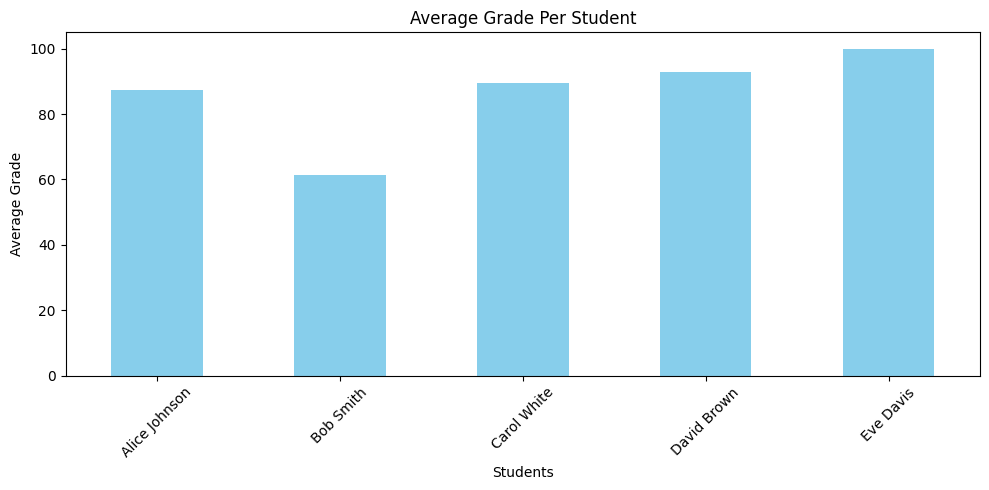

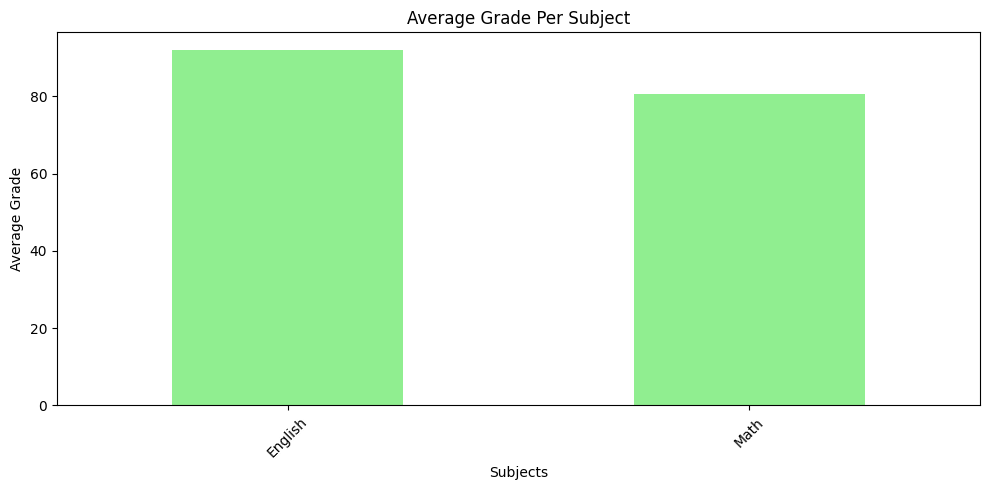

In [64]:

df['student'] = df['first_name'] + ' ' + df['last_name']
avg_grades_per_student = df.groupby('student')['grade'].mean()

avg_grades_per_subject = df.groupby('subject')['grade'].mean()

# Plotting the average grade per student
plt.figure(figsize=(10, 5))
avg_grades_per_student.plot(kind='bar', color='skyblue')
plt.title('Average Grade Per Student')
plt.xlabel('Students')
plt.ylabel('Average Grade')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting the average grade per subject
plt.figure(figsize=(10, 5))
avg_grades_per_subject.plot(kind='bar', color='lightgreen')
plt.title('Average Grade Per Subject')
plt.xlabel('Subjects')
plt.ylabel('Average Grade')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

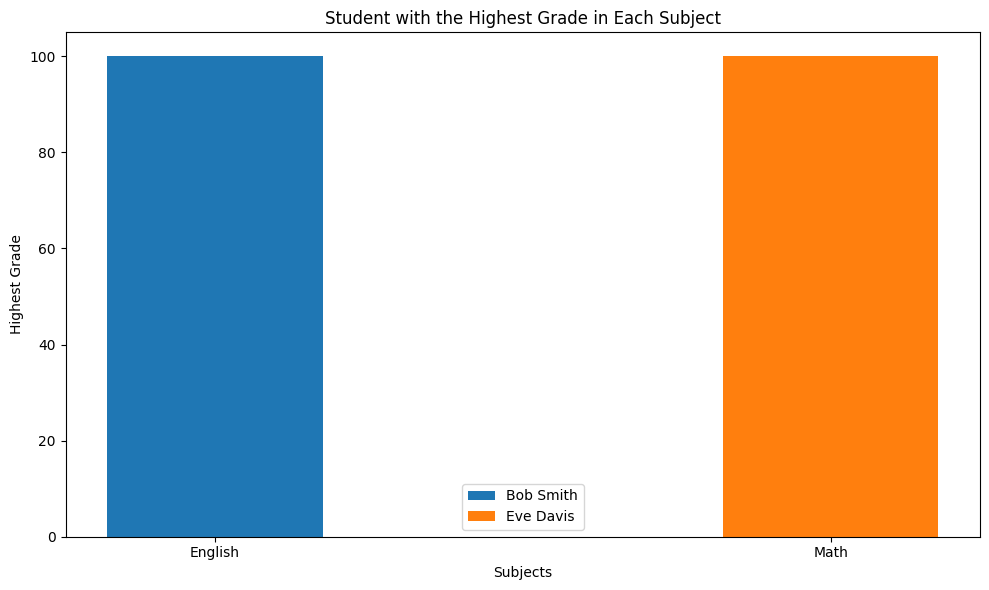

In [73]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Query to find the student with the highest grade in each subject
df = pd.read_sql_query('''
SELECT students.first_name, students.last_name, grades.subject, grades.grade
FROM students
JOIN grades ON students.student_id = grades.student_id
WHERE (grades.subject, grades.grade) IN (
    SELECT subject, MAX(grade) 
    FROM grades 
    GROUP BY subject
)
GROUP BY grades.subject
''', connection)

# Combine first name and last name to create a full name for each student
df['student'] = df['first_name'] + ' ' + df['last_name']

# Get unique subjects
subjects = df['subject'].unique()

# Set up figure and axes for the grouped bar chart
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
for idx, row in df.iterrows():
    ax.bar(idx, row['grade'], width=bar_width, label=row['student'])ax.set_xticks(np.arange(len(subjects)))
ax.set_xticklabels(df['subject'])
ax.set_xlabel('Subjects')
ax.set_ylabel('Highest Grade')
ax.set_title('Student with the Highest Grade in Each Subject')
ax.legend()
plt.tight_layout()
plt.show()


In [72]:
df

,first_name,last_name,subject,grade,student
0,Bob,Smith,English,100,Bob Smith
1,Eve,Davis,Math,100,Eve Davis
2,Eve,Davis,English,100,Eve Davis
